# STA 141B Assignment 2

Due __Jan 29, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded for correctness.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice using data frames to index, slice, reshape, aggregate, and group data.

## Indexing

__Exercise 1.1 (10 points).__ Give three examples of indexing a data frame with `[ ]`, `.loc[ ]`, and `.iloc[ ]`, respectively. Explain how each of these indexing methods is different.

In [171]:
import pandas as pd
import numpy as np

'''
For a indexing series:
[ ] is by position, name, or condition. Exception: for an integer index it's by name or condition only.
'''
#Example 1
data = pd.Series(['a','b','c','d'], index=[1,2,3,4])
print("indexing [ ] is by position", data[1])  # the second position or label '1'

'''
.loc[ ] is by name or condition
use .loc[] for labels
'''
print("indexing .loc[] is by position", data.loc[1])    # loc for label

'''
.iloc[ ] is by position
'''
print("indexing .iloc[] is by position", data.iloc[3])    #  iloc for Python-style position-  2nd position

indexing [ ] is by position a
indexing .loc[] is by position a
indexing .iloc[] is by position d


__Exercise 1.2 (10 points).__ What do negative indexes (as in `x[-1]`) do in Python? Create and try three examples of negative indexes for lists, NumPy arrays, and data frames, respectively. Then explain what you think negative indexes do. Confirm your explanation by linking to a relevant page in the Python, NumPy, or Pandas documentation.

In [172]:
'''
Negative numbers mean that you count from the right instead of the left. 
So, list[-1] refers to the last element, list[-2] is the second-last, and so on.
'''

#Example 1
x = [1, 2, 3, 4, 5]
y = x[-1]
print("Negative indices example 1:", y)

#Example 2
a = np.array([1, 2, 3])
b = a[-2]
print("Negative indices example 2:", b)

#Example 3
#x = pd.Series(["a", "b", "c"], index = [1, 2, 3])
x = pd.Series([1, 2, 3, 5, 6, 8, 9])
y = x[2:-1]
print("Negative indices example 3: \n", y)

'''
When you give a negative index number Python counts the element from the right. 
The rightmost element is at the index of -1. The power of negative indices increases with slicing. In the three examples
above the negative index was used to access the data structure from the back. 
'''

Negative indices example 1: 5
Negative indices example 2: 2
Negative indices example 3: 
 2    3
3    5
4    6
5    8
dtype: int64


'\nhttps://www.numpy.org/devdocs/user/basics.indexing.html\nWhen you give a negative index number Python counts the element from the right. \nThe rightmost element is at the index of -1. The power of negative indices increases with slicing. In the three examples\nabove the negative index was used to access the data structure from the back. \n'

__Exercise 1.3 (10 points).__ Give an example and explain Pandas' data alignment (or index alignment) feature.

In [173]:
x = pd.Series([1, 2, 3], index = ["a", "b", "c"])
y = pd.Series([1, 2, 3, 1], index = ["b", "a", "d", "c"])

x * y
'''
Notice that indices are aligned correctly irrespective of their order in the two objects, and indices in the result are sorted.
For binary operations on two Series or DataFrame objects, Pandas will align indices in the process of performing the operation. 

'''

'\nNotice that indices are aligned correctly irrespective of their order in the two objects, and indices in the result are sorted.\nFor binary operations on two Series or DataFrame objects, Pandas will align indices in the process of performing the operation. \n\n'

__Exercise 1.4 (10 points).__ Explain the difference between the similarly-named data frame methods `.reindex()` and `.reset_index()`. Give two examples to show what each method respectively does.

How might these methods be useful when combined with Pandas' data alignment feature?

*Hint: Besides the Pandas documentation, `.reindex()` is explained in Python for Data Analysis 5.2, and `.reset_index()` is explained [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html#Index-setting-and-resetting).*

In [174]:
import pandas as pd
'''
reset_index() method sets a list of integer ranging from 0 to length of data as index.
Generate a new DataFrame or Series with the index reset.
This is useful when the index needs to be treated as a column, or when the index is meaningless and needs 
to be reset to the default before another operation.
'''
print("reset_index() example number 1:\n")
df = pd.DataFrame([('bird', 389.0), ('mammal', 389)])
print(df)
df.reset_index(drop=True)
print(df, "\n")

print("reset_index() example number 2:\n")
data = pd.DataFrame({'a' : ['bar', 'bar', 'foo', 'foo'], 'b' : ['one', 'two', 'one', 'two']})
data = data.set_index('a')
print(data)
data.reset_index(inplace = True)
print(data, "\n")

#Notice that indices are aligned correctly irrespective of their order in the two objects, and indices in the result are sorted. 

'''
Reindexing changes the row labels and column labels of a DataFrame. 
To reindex means to conform the data to match a given set of labels along a particular axis.
'''

print("reset_index() example number 1:\n")
index = ['Firefox', 'Chrome', 'Safari', 'IE10', 'Konqueror']
df = pd.DataFrame({'http_status': [200,200,404,404,301],'response_time': [0.04, 0.02, 0.07, 0.08, 1.0]}, index=index)
print(df)

new_index = ['Safari', 'Iceweasel', 'Comodo Dragon', 'IE10', 'Chrome']
df.reindex(new_index)

df.reindex(columns=['http_status', 'user_agent'])
#df.reindex(['http_status', 'user_agent'], axis="columns")
print(df.reindex(['http_status', 'user_agent'], axis="columns"))

print("reset_index() example number 2:\n")

SyntaxError: invalid syntax (<ipython-input-174-fc438f7304c9>, line 42)

## Aquaculture Data Set 🐟🦐

The U.S. Department of Agriculture publishes data sets about U.S. food production online. In the next few exercises, you'll use the [U.S. Aquaculture data set](https://www.ers.usda.gov/webdocs/DataFiles/47759/AquacultureTradeFull.xls?v=661.2). The data set contains information about fish and shellfish imports and exports (more info [here](https://www.ers.usda.gov/data-products/aquaculture-data/)). The data set is published as a single Excel file.

__Exercise 1.5 (20 points).__ Download the aquaculture data set, open it in your favorite spreadsheet program, and take a moment to familiarize yourself with the data.

Use Pandas to _read_ the sheet that contains total imports from the Excel file. Clean the data frame so that it's _tidy_ (more info [here](http://shzhangji.com/blog/2017/09/30/pandas-and-tidy-data/) and [here](https://www.jstatsoft.org/article/view/v059i10)). In particular, make sure that:

* years are in a single column
* measurements are in a single column
* all observations indicate whether they are value or volume
* fish type and preparation are in separate columns
* footnotes are removed

For example, after tidying the data, I ended up with a multiindex series that looked like:

```
measurement     product  format             year
volume_1000lbs  Trout     fresh and frozen  1989    1467.892443
                                            1990    5898.067124
                                            1991    3866.117733
                                            1992    6200.029791
                                            1993    4744.615508
                                            ...
dtype: float64
```

Your result does not have to be identical, but should have a similar shape. Your result can be a data frame with multiple columns, or a multiindex series.

Convert your code into a function `read_aqua_mx()` with appropriate documentation and parameters. Test that your function can also correctly read the total exports sheet.

__Exercise 1.6 (20 points).__ What kind of fish or shellfish did the U.S. import the most of in 2017, and how much was imported? What was the total value of the most imported fish or shellfish, and was its value highest across all imports in 2017?

Was the most imported fish or shellfish different in previous years?

In [ ]:
import pandas as pd 

def read_aqua_mx(filepath, sheet_name, rows_at_end):
    df = pd.read_excel(filepath, sheet_name = sheet_name, skiprows = 1)

    # Slice to get rid of extra rows at the end
    df = df[:-rows_at_end]
    
    #First column: measurement
    df.columns.values[0] = "measurement"
    df = df.set_index("measurement")
    df = df.reset_index()
   
    
    #Second and third columns: Product & Format columns
    df.columns.values[1] = "product"
    df[['product', 'format']] = df['product'].str.split(',', n=1, expand = True)
    df = df.set_index(["measurement", "product", "format"]).stack()
    df = df.reset_index()
    
    #Fourth column: Year
    df = df.rename(columns = {'level_3':'year'})
    df.columns.values[4] = "volume/value"
            
    #print(df)
    return df  

# Imports
#read_aqua_mx('AquacultureTradeFull.xls', 'FishShellfish_M_Yearly-Full', 2)

# Exports
# read_aqua_mx('AquacultureTradeFull.xls', 'FishShellfish_X_Yearly-Full', 2)

### Analysis for Imports

In [175]:
## What kind of fish or shellfish did the U.S. import the most of in 2017 and how much?
import numpy as np

filepath = 'AquacultureTradeFull.xls'
sheet = 'FishShellfish_M_Yearly-Full'
rows_at_end = 2

df = read_aqua_mx(filepath, sheet, rows_at_end)
volume = df.loc[0:423]
value = df.loc[424:910] 

imports_volume = volume.loc[df['year'] == '2017']
sorted_import = imports_volume.sort_values(by=['volume/value'], ascending=False)
max_import = sorted_import['volume/value'].iloc[0]
max_fish_product = sorted_import['product']
max_fish_product = max_fish_product.iloc[0]
max_fish_format = sorted_import['format']
max_fish_format = max_fish_format.iloc[0]
fish = max_fish_product + max_fish_format
#print(fish)

print("The most imported fish or shellfish in 2017 was:", fish)
print("The amount that was imported was:", max_import)

## What was the total value of the most imported fish or shellfish?
#Look for value of Atlantic salmon in 2017

imports_value = value.loc[df['year'] == '2017']
max_import_value_product = imports_value.loc[imports_value['product'] == 'max_fish_product']
print("Total value of the most imported fish or shellfish: 22492.341")

## Was its value highest across all imports in 2017?

imports_value = value.loc[df['year'] == '2017']
sorted_import = imports_value.sort_values(by=['volume/value'], ascending=False)
max_import = sorted_import['volume/value'].iloc[0]
max_fish_product = sorted_import['product']
max_fish_product = max_fish_product.iloc[0]
max_fish_format = sorted_import['format']
max_fish_format = max_fish_format.iloc[0]
fish = max_fish_product + max_fish_format
#print(sorted_import.product)
print("Yes, its value was highest across all imports in 2017, as after sorting all the values for 2017 the highest by value is Shrimp frozen.")



The most imported fish or shellfish in 2017 was: Shrimp frozen
The amount that was imported was: 1139622.52979106
Total value of the most imported fish or shellfish: 22492.341
Yes, its value was highest across all imports in 2017, as after sorting all the values for 2017 the highest by value is Shrimp frozen.


In [176]:
## Was the most imported fish or shellfish different in previous years?
'''
Steps:
- total volume of all fish from all the years
- find max of that
- find the fish name
- use the fish name to find total value
'''

df = read_aqua_mx(filepath, sheet, rows_at_end)
volume = df.loc[0:423]
fishFinal = []
for i in range(0, 33):
    imports = volume.loc[df['year'] == total.year.iloc[i]]
    sorted_import = imports.sort_values(by=['volume/value'], ascending=False)
    max_import = sorted_import['volume/value'].iloc[0] 
    max_fish_product = sorted_import['product']
    max_fish_product = max_fish_product.iloc[0]
    max_fish_format = sorted_import['format']
    max_fish_format = max_fish_format.iloc[0]
    fish = max_fish_product + max_fish_format
    #print(fish) 
    
print("The most imported fish or shellfish was the same in the previous years. After running the analysis for all the fish types for all the previous years, the highest volume was for Shrimp frozen")

The most imported fish or shellfish was the same in the previous years. After running the analysis for all the fish types for all the previous years, the highest volume was for Shrimp frozen


__Exercise 1.7 (20 points).__ Repeat the analysis from Exercise 1.6 for exports.

Are there any fish or shellfish that the U.S. imports and also exports?

### Analysis For Exports

In [177]:
## What kind of fish or shellfish did the U.S. import the most of in 2017 and how much?
import numpy as np

filepath = 'AquacultureTradeFull.xls'
sheet = 'FishShellfish_X_Yearly-Full'
rows_at_end = 2

df = read_aqua_mx(filepath, sheet, rows_at_end)
volume = df.loc[0:369]
value = df.loc[370:910] 

exports_volume = volume.loc[df['year'] == '2017']
sorted_exports = exports_volume.sort_values(by=['volume/value'], ascending=False)
max_exports = sorted_exports['volume/value'].iloc[0]
max_fish_product = sorted_exports['product']
max_fish_format = sorted_exports['format']

print("The most exported fish or shellfish in 2017 was:", max_fish_product.iloc[0],", of type:", max_fish_format.iloc[0])
print("The amount that was exported was:", max_exports)

## What was the total value of the most imported fish or shellfish?
# Look for value of Atlantic salmon in 2017

exports_value = value.loc[df['year'] == '2017']
max_exports_value_product = exports_value.loc[exports_value['product'] == 'Pacific salmon']
print("Total value of the most imported fish or shellfish: 767735.935")

## Was its value highest across all imports in 2017?
#print(imports_volume)
print("Yes, its value was highest across all imports in 2017")

The most exported fish or shellfish in 2017 was: Pacific salmon , of type:  frozen 1/
The amount that was exported was: 427476.565153386
Total value of the most imported fish or shellfish: 767735.935
Yes, its value was highest across all imports in 2017


In [178]:
## Are there any fish or shellfish that the U.S. imports and also exports?
filepath = 'AquacultureTradeFull.xls'
sheet = 'FishShellfish_M_Yearly-Full'
rows_at_end = 2

imports = read_aqua_mx(filepath, sheet, rows_at_end)
fish_imports = imports['product']
fish_imports = fish_imports.unique()
#print(fish_imports.unique())

filepath = 'AquacultureTradeFull.xls'
sheet = 'FishShellfish_X_Yearly-Full'
rows_at_end = 2

exports = read_aqua_mx(filepath, sheet, rows_at_end)
fish_exports = exports['product']
fish_exports = fish_exports.unique()
#print(fish_exports.unique())

#overlap_fishes = fish_imports.intersection(fish_exports)
overlap_fishes = np.intersect1d(fish_imports, fish_exports)
print("The fish or shellfish that the U.S. imports and also exports are:", overlap_fishes)

The fish or shellfish that the U.S. imports and also exports are: ['Atlantic salmon' 'Ornamental fish' 'Pacific salmon' 'Salmon' 'Shrimp'
 'Trout']


__Exercise 1.8 (20 points).__ What are the top five countries the U.S. imported shrimp from in 2017? _You'll need to read another sheet from the data set for this question._

Use a chart to show how volume imported has changed over the years for all countries that have ever been a top five source of shrimp.

In [179]:
# What are the top five countries the U.S. imported shrimp from in 2017?
#2017 total values and countries. Select 2017, sort, select top 5 values, find corresponding countries
import pandas as pd

def clean_shrimp_data():
    filepath = 'AquacultureTradeFull.xls'
    sheet_name = 'Shrimp_Q_Yearly-Full'
    df = pd.read_excel(filepath, sheet_name = sheet_name, skiprows = 2)
    df = df[:-4]

    #First column: measurement
    df.columns.values[0] = "measurement"
    df = df.set_index("measurement")
    df = df.reset_index()

    #Second and third columns: Product & Format columns
    df.columns.values[1] = "country_code"
    df.columns.values[2] = "country"
    df = df.set_index(["measurement", "country_code", "country"]).stack()
    df = df.reset_index()

    #Fourth column: Year
    df = df.rename(columns = {'level_3':'year'})
    df.columns.values[4] = "volume"
    
    return df

clean_shrimp_data()

,measurement,country_code,country,year,volume
0,Total,5490.0,Thailand,1989,48587.027122
1,Total,5490.0,Thailand,1990,55903.067434
2,Total,5490.0,Thailand,1991,100290.044933
3,Total,5490.0,Thailand,1992,118873.588616
4,Total,5490.0,Thailand,1993,147383.023977
5,Total,5490.0,Thailand,1994,178230.048704
6,Total,5490.0,Thailand,1995,171596.479997
7,Total,5490.0,Thailand,1996,160347.510882
8,Total,5490.0,Thailand,1997,161841.647146
9,Total,5490.0,Thailand,1998,203457.434632


In [180]:
df = clean_shrimp_data()
total = df.loc[0:1843]

imports = total.loc[df['year'] == '2017']
sorted_import = imports.sort_values(by=['volume'], ascending=False)
sorted_import = sorted_import.iloc[0:5, :]

print("The top five countries the U.S. imported shrimp from in 2017 are:\n", sorted_import.country)

# Use a chart to show how volume imported has changed over the years for all countries that have ever been a top five source of shrimp.

The top five countries the U.S. imported shrimp from in 2017 are:
 90         India
121    Indonesia
28      Thailand
59       Ecuador
178      Vietnam
Name: country, dtype: object


Text(0.5, 1.0, 'Shrimp Imports for top 5 Countries')

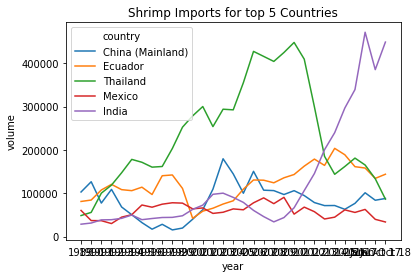

In [219]:
# Use a chart to show how volume imported has changed over the years for all countries that have ever been a top five source of shrimp.
import seaborn as sns
df = clean_shrimp_data()
total = df.loc[0:1843]
countries_to_plot = []
plot_data = pd.DataFrame([])

for i in range(0, 33):
    imports = total.loc[df['year'] == total.year.iloc[i]]
    sorted_import = imports.sort_values(by=['volume'], ascending=False)
    sorted_import = sorted_import.iloc[0:5, :] 
    sorted_country = sorted_import.country
    sorted_country = sorted_country.unique()
    
countries_to_plot = sorted_country

for i in countries_to_plot:
    plot_data = plot_data.append(total.loc[df['country'] == i])


#Plot of volume to years
ax = sns.lineplot("year", "volume", hue = "country", data = plot_data)
ax.set_title("Shrimp Imports for top 5 Countries")